# Lab 03 - Regression
### E/17/297


### 1. Linear regression on diabetes dataset

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression

folder = '/content/drive/MyDrive/CO544/Lab 03/'

In [12]:
# Load data, inspect and do exploratory plots
diabetes = datasets.load_diabetes()

X = diabetes.data
t = diabetes.target

# Inspect sizes
NumData, NumFeatures = X.shape
print(NumData, NumFeatures)
print(t.shape)


442 10
(442,)


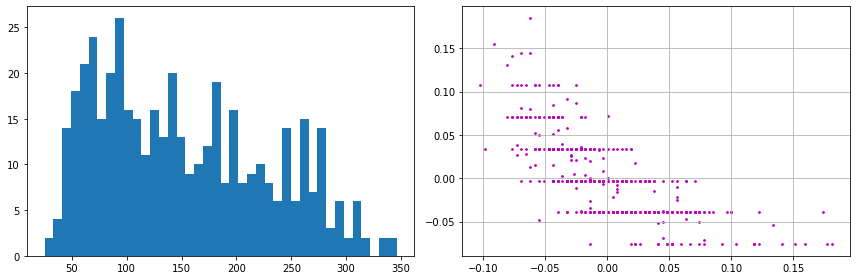

In [13]:
# Plot and save
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax[0].hist(t, bins=40)

ax[1].scatter(X[:,6],  X[:,7], c='m', s=3)
ax[1].grid(True)

plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

### 2. Comparing pseudo-inverse solution to sklearn output

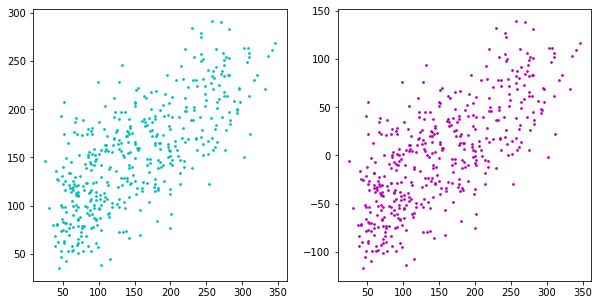

In [14]:
# linear regression using sklearn
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)

# Pseudo-incerse solution to linear regression
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w

#  Plot predictions to check if they look the same!
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[1].scatter(t, th2, c='m', s=3)

### 3. Tikhanov (quadratic) Regularizer

<BarContainer object of 10 artists>

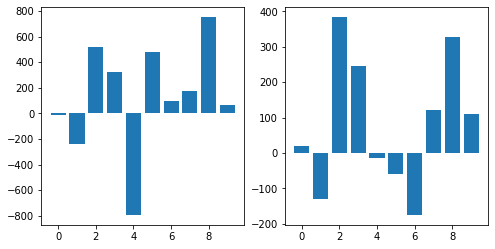

In [15]:
gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR)


### 4. Sparsity inducing (lasso) regularizer

<BarContainer object of 442 artists>

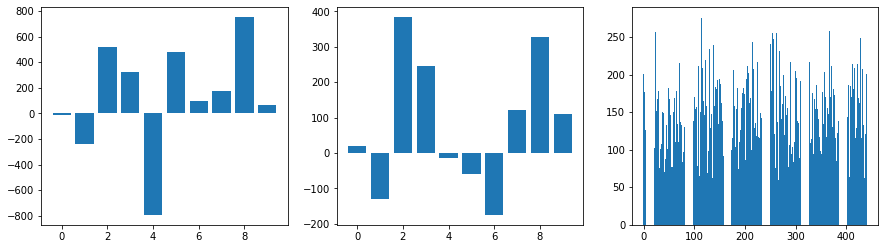

In [16]:
from sklearn.linear_model import Lasso

ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR)
ax[2].bar(np.arange(len(th_lasso)), th_lasso)

### 5. Lasso Regularization path on a synthetic example (Set up data):

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets


In [18]:
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.

N = 100
y = np.empty(0)
X = np.empty([0,6])

for i in range(N):
    Z1 = np.random.randn()
    Z2 = np.random.randn()
    y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2]) + np.random.randn(6)/5
    X = np.vstack((X, Xarr.tolist()))
    


### 6. Lasso Regularization path on a synthetic example (Regression and paths):

Text(0, 0.5, 'Regression Coefficients')

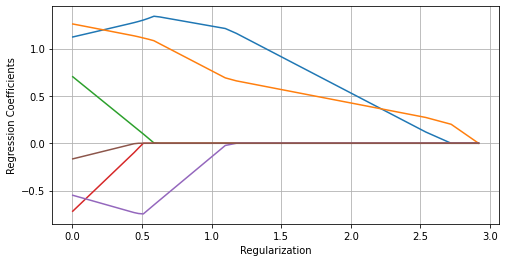

In [19]:
# Compute regressions with Lasso and return paths
alphas_lasso, coefs_lasso, _ = lasso_path(X,y,fit_intercept=False)

# Plot each coefficient
fig ,ax = plt.subplots(figsize = (8,4))
for i in range(6):
    ax.plot(alphas_lasso,coefs_lasso[i,:])
    
ax.grid(True)
ax.set_xlabel("Regularization")
ax.set_ylabel("Regression Coefficients")


### 7. Predicting Solubility of Chemical Compounds

In [20]:
import pandas as pd

sol = pd.read_excel("Husskonen_Solubility_Features.xlsx")
print(sol.shape)

(932, 2261)


In [25]:
colnames = sol.columns
print(colnames)

t = sol["LogS.M."].to_numpy()
X = sol[colnames[5:len(colnames)-1]].to_numpy()
N, p = X.shape


Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


In [26]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t ,test_size=0.3)


In [34]:
# Regularized regression

gamma = 0.1

w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train

th_train = X_train @ w
th_test = X_test @ w


Text(0.5, 1.0, 'Test Data')

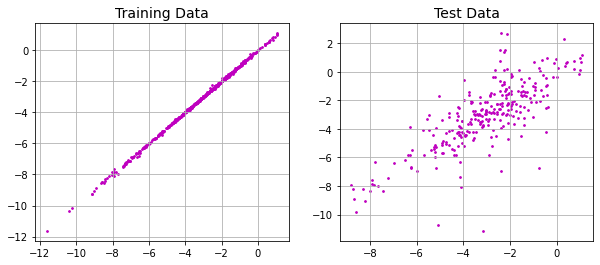

In [35]:
# Plot training and test predictions

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].scatter(t_train, th_train, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)

ax[1].scatter(t_test, th_test, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)



####  Implement a lasso regularized solution and plot graphs of how the prediction error(on the test data) and the corresponding number of non-zero coefficients change with increasing regularization.
